In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [11]:
path = 'datasetsingrid/'

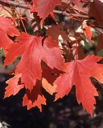

In [12]:
from PIL import Image

im = Image.open(path + 'maple/maple tree leaf_28.jpg')
im.to_thumb(128,128)

In [13]:
from fastai.vision.all import *
filenames = get_image_files(path)
filenames

(#1538) [Path('datasetsingrid/birch/birch tree leaf_0.jpg'),Path('datasetsingrid/birch/birch tree leaf_1.jpg'),Path('datasetsingrid/birch/birch tree leaf_10.jpg'),Path('datasetsingrid/birch/birch tree leaf_100.jpg'),Path('datasetsingrid/birch/birch tree leaf_101.jpg'),Path('datasetsingrid/birch/birch tree leaf_102.jpg'),Path('datasetsingrid/birch/birch tree leaf_103.jpg'),Path('datasetsingrid/birch/birch tree leaf_104.jpg'),Path('datasetsingrid/birch/birch tree leaf_105.jpg'),Path('datasetsingrid/birch/birch tree leaf_106.jpg')...]

In [14]:
failed = verify_images(filenames)
failed

(#0) []

In [15]:
leaves = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls = leaves.dataloaders(path)

c:\Users\ingri\anaconda3\envs\DLStreamlit\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


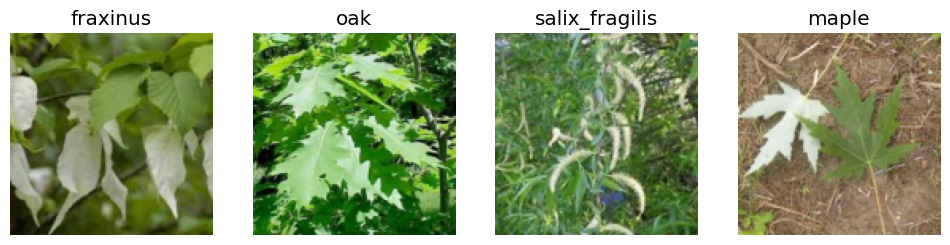

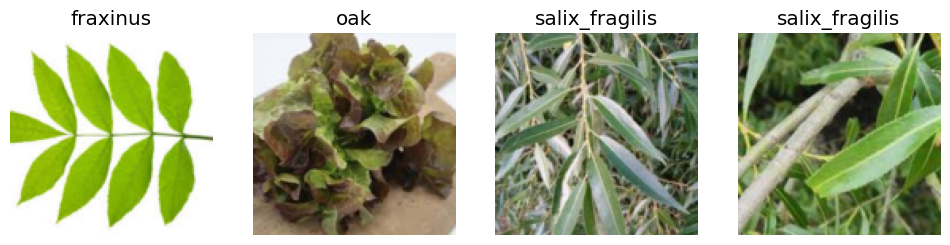

In [21]:
dls.train.show_batch(max_n=4, nrows=1)
dls.valid.show_batch(max_n=4, nrows=1)

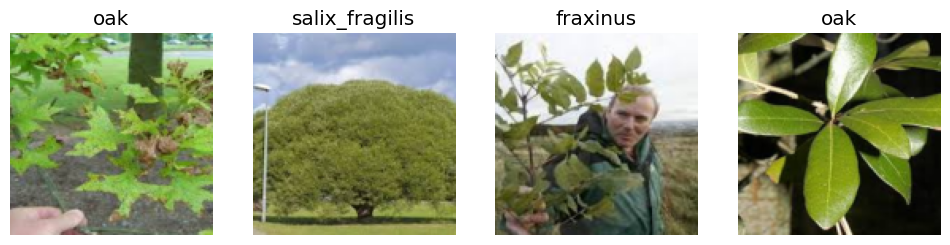

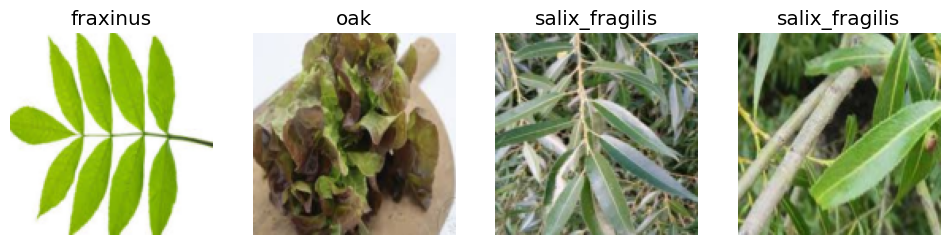

In [24]:
customDataset = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(128, min_scale=0.3))

dls = customDataset.dataloaders(path)

dls.train.show_batch(max_n=4, nrows=1)
dls.valid.show_batch(max_n=4, nrows=1)

In [25]:
our_out_of_the_box_model = vision_learner(dls, resnet50, metrics=error_rate)
our_out_of_the_box_model.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\ingri/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:08<00:00, 12.7MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.085279,1.158719,0.355049,00:54


epoch,train_loss,valid_loss,error_rate,time
0,1.363976,1.033333,0.312704,01:15
1,1.148999,1.173259,0.355049,01:07
2,0.975686,1.121056,0.315961,01:09


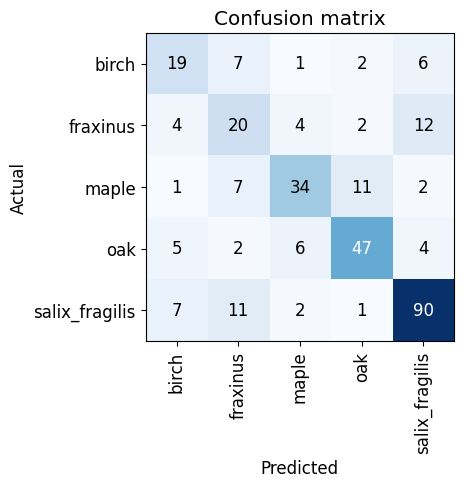

In [26]:
interp = ClassificationInterpretation.from_learner(our_out_of_the_box_model)
interp.plot_confusion_matrix()

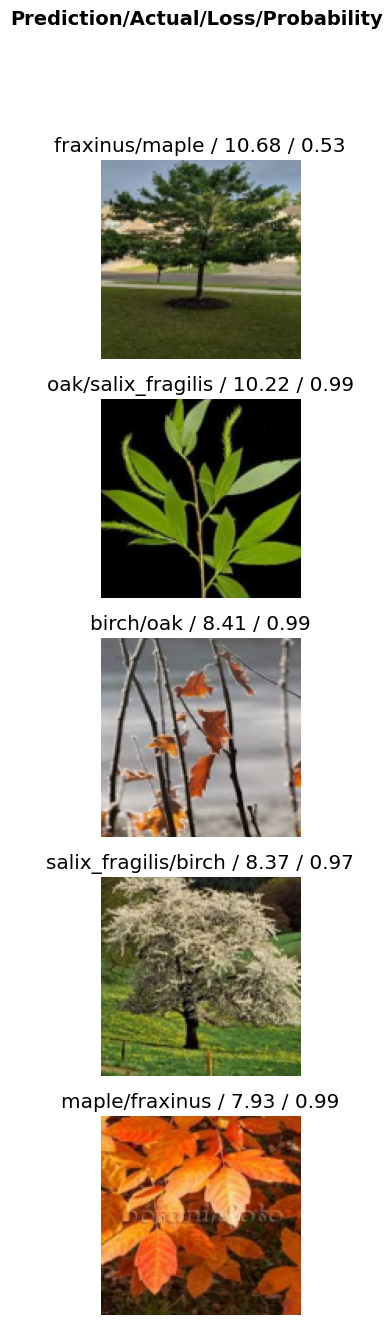

In [30]:
interp.plot_top_losses(5, nrows=5)

In [31]:
# saving our model, by default in a folder called 'models'.
our_out_of_the_box_model.save('first_modelIngrid')
#creating an serialized pickle object of our model, the export.pkl file
our_out_of_the_box_model.export()

In [32]:
our_out_of_the_box_model_inference = load_learner('export.pkl')

In [37]:
our_out_of_the_box_model_inference.predict(path + 'maple/maple tree leaf_185.jpg')

('salix_fragilis', tensor(4), tensor([0.2418, 0.3165, 0.0719, 0.0004, 0.3694]))

In [38]:
our_out_of_the_box_model_inference.dls.vocab

['birch', 'fraxinus', 'maple', 'oak', 'salix_fragilis']